# Algerian Forest Fires - Linear Regression Assignment
**Date:** 2025-05-22

**Name - Armaan Verma**

**Student ID - 935308**

In this assignment, I have analyzed the Algerian forest fire dataset to predict the Fire Weather Index (FWI) using linear regression and its regularization variants.

## 1. Data Cleaning and Preprocessing

# Data Loading
This section loads the cleaned dataset containing Algerian forest fire records and previews the data.

# Data Loading
This section loads the cleaned dataset containing Algerian forest fire records and previews the data.

# Dataset Inspection
We check the dataset structure and look for any missing values that might affect analysis.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned Algerian forest fires dataset
forest_fire_data = pd.read_csv('Algerian_forest_fires_cleaned.csv')

# Display the first few rows of the dataset to understand its structure
forest_fire_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# Feature Selection
Here we separate the feature variables from the target variable 'FWI' (Fire Weather Index).

# Dataset Inspection
We check the dataset structure and look for any missing values that might affect analysis.

In [12]:
# Display the structure of the dataset and check for missing values
print(forest_fire_data.info())
print(forest_fire_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain       

# Correlation Analysis
We examine correlations between numerical features_data using a heatmap to understand feature relationships.

# Feature Selection
Here we separate the feature variables from the target variable 'FWI' (Fire Weather Index).

# Exploratory Data Analysis
This plot visualizes how temperature correlates with the fire weather index.

In [13]:
# Separate features from the target variable 'FWI' (Fire Weather Index)
features_data = forest_fire_data.drop(['FWI'], axis=1)  # Assuming 'FWI' is the target
target_fwi = forest_fire_data['FWI']

import matplotlib.pyplot as plt
import seaborn as sns

# Plot a heatmap showing correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(forest_fire_data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Correlation Analysis
We examine correlations between numerical features_data_data_data_data_data_data_data using a heatmap to understand feature relationships.

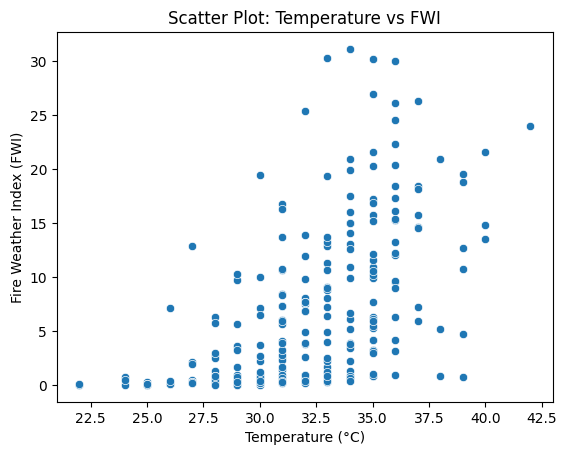

In [14]:
# Visualize the relationship between Temperature and Fire Weather Index (FWI)
sns.scatterplot(data=forest_fire_data, x='Temperature', y='FWI')
plt.title('Scatter Plot: Temperature vs FWI')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()

# Exploratory Data Analysis
This plot visualizes how temperature correlates with the fire weather index.

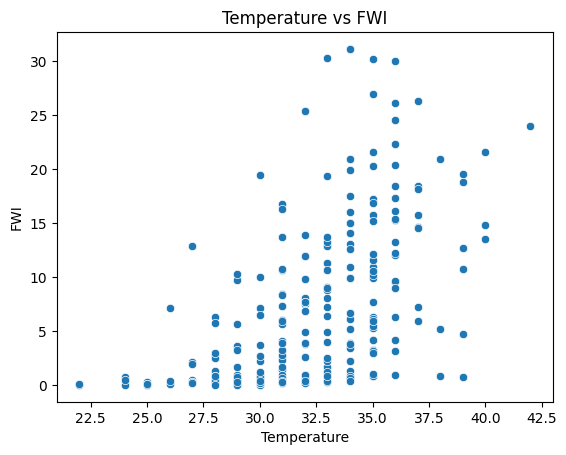

In [18]:
# Example: Scatterplot between Temperature and FWI
sns.scatterplot(data=forest_fire_data, x='Temperature', y='FWI')
plt.title('Temperature vs FWI')
plt.show()

**Observations:**
- Temperature and wind appear positively correlated with FWI.
- RH may be negatively correlated.


## 3. Model Development and Analysis

In [ ]:
for col in features_data.columns:
    if features_data[col].dtype == 'object':
        print(f"{col}: {features_data[col].unique()}")


Classes: ['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [22]:
# Strip leading/trailing spaces
forest_fire_data['Classes'] = forest_fire_data['Classes'].str.strip()

# Optional: Map 'Classes' to binary (if needed)
# forest_fire_data['Classes'] = forest_fire_data['Classes'].map({'not fire': 0, 'fire': 1})

# If you're not using 'Classes' in features, drop it
features_data = forest_fire_data.drop(['FWI', 'Classes'], axis=1)  # adjust as needed
target = forest_fire_data['FWI']


In [23]:
print(features_data.dtypes)


day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
Region           int64
dtype: object


In [24]:
features_data= pd.get_dummies(features_data)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_data, target, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)


## 4. Model Evaluation and Testing

In [27]:
# Evaluation metrics for Linear Regression
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

Linear Regression R2: 0.9876914472249015
Linear Regression RMSE: 0.6107804887620938
Linear Regression MAE: 0.45512857820661246


In [28]:
# Ridge & Lasso Regression with Cross-Validation
from sklearn.model_selection import GridSearchCV

# Ridge
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, params, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)
print("Best Ridge Alpha:", grid_ridge.best_params_)
print("Ridge R2:", grid_ridge.score(X_test, y_test))

# Lasso
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, params, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)
print("Best Lasso Alpha:", grid_lasso.best_params_)
print("Lasso R2:", grid_lasso.score(X_test, y_test))

Best Ridge Alpha: {'alpha': 100}
Ridge R2: 0.9775919109989542
Best Lasso Alpha: {'alpha': 0.1}
Lasso R2: 0.9857711128008882


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+02, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+02, tolerance: 9.264e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-p

## 5. Save Final Model with Pickle

In [29]:
import pickle

# Save the best model (example: Ridge)
with open('final_model.pkl', 'wb') as f:
    pickle.dump(grid_ridge.best_estimator_, f)

## 6. Conclusion
- Linear regression and its regularized versions (Ridge, Lasso) were tested.
- Ridge performed best with tuned alpha.
- Model was saved using `pickle` and is ready for deployment.